![header](http://eurogoos.eu/wp-content/uploads/SOCIB-logo.jpg)

# SOCIB API TRAINING
<div style="text-align: right"><i> 04-Part-one-out-of-06 </i></div>

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">
        <span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span>
    </li>
    <li><span><a href="#Setup" data-toc-modified-id="Setup-2">
        <span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span>
        <ul class="toc-item">
            <li>
                <span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-2.1">
                    <span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing modules</a></span>
            </li>
            <li>
                <span><a href="#API-token" data-toc-modified-id="API-token-2.2">
                    <span class="toc-item-num">2.2&nbsp;&nbsp;</span>API token</a></span>
            </li>
            <li>
                <span><a href="#Auxiliary-functions" data-toc-modified-id="Auxiliary-functions-2.3">
                    <span class="toc-item-num">2.3&nbsp;&nbsp;</span>Auxiliary functions</a></span>
            </li>
        </ul>
    <li>
        <span><a href="#Querying-SOCIB-API-for-a-given-entry/file-content-(data!):" data-toc-modified-id="Querying-SOCIB-API-for-a-given-entry/file-content-(data!):"><span class="toc-item-num">3&nbsp;&nbsp;</span>Querying SOCIB API for a given entry/file content (data!):</a></span>
    <li><span><a href="#Next-tutorial" data-toc-modified-id="Next-tutorial">
        <span class="toc-item-num">4&nbsp;&nbsp;</span>Next tutorial</a></span></li>
    </ul>
</div>

---

# ENTRIES

## Introduction 

SOCIB API is a door users can knock-on in order to get information about the Balearic Islands Coastal Ocean Observing and Forecast System (SOCIB). SOCIB API is represented by an generic url (SOCIB API url). The elements that trigger a response when added to the generic API url are called `ENDPOINTS`.
Among the present posibilities:
<ul>
    <li>measured variables (<span class="alert-info">/standard-variables/</span>)</li>
    <li>stock of instruments (<span class="alert-info">/instrument-types/</span>) and platforms(<span class="alert-info">/platform-types/</span>), 
</li>
    <li>data maturity (<span class="alert-info">/processing-levels/</span> and <span class="alert-info">/data-modes/</span>)</li>
    <li>kind of data (<span class="alert-info">/feature-types/</span>)</li>
    <li>data entities (<span class="alert-success"><b>/entries/<b></span>, <span class="alert-info">/data-sources/</span>, <span class="alert-info">/instruments/</span>,<span class="alert-info">/platforms/</span>, <span class="alert-info">/data-products/</span>)</li>

</ul>

<br>This notebook will focus then on the <span class="alert-success" style=""><b>/entries/</b></span> endpoint.

---

## Setup

### Importing modules

We will relly on a set of python modules to deal with SOCIB API next.<br> `Please run the next cells` so that they can be used by the present Jupyter Notebook:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import json
import pandas
import requests
import IPython
from json2html import *

In [2]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import folium
from folium import plugins
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

<div class="alert alert-block alert-warning" style="margin-left: 2em">
<b>Tip!</b>
    
***  
If any of them raises any error please run prior to load it and in a dedicated cell, either:<ul><li> <i>`!conda install packageName --yes`</i></li> or <li><i>`!pip install packageName --yes`</i></li></ul>

### API token

To be able to query SOCIB API you will need first a <i>token</i> (api key).<br>To get one please visit the [API home page](http://api.socib.es/home/) and fill-in the form at bottom. An email will be sent to you with such <i>token</i>.

`Please run the next cell if you wanna have a glimpse to API home page`:

In [3]:
IPython.display.HTML('<iframe src="http://api.socib.es/home/"" width=100% height=500></iframe>')

`Please set in the next cell your api_key and run the cell below to load it in memory for later use`:

In [4]:
api_key = '' #write here the token emailed to you

In [5]:
api_url = 'http://api.socib.es'
headers = {
    'accept': 'application/vnd.socib+json',
    'apikey': api_key,
}

<div class="alert alert-block alert-warning" style="margin-left: 2em">
<b>Tip!</b>
    
***  
If you do not remember your token or wanna ask for a new one please reach <i>data.center@socib.es</i> with the following `subject`: 'SOCIB API TOKEN: UPDATE/REMIND REQUEST'

### Auxiliary functions

In [6]:
def CTD_sampling_points(feature, color, markersize, zoom, legend):
    #coordinates
    latitudes, longitudes = feature[0]['coordinates']['latitude']['data'],feature[0]['coordinates']['longitude']['data']
    #bbox
    lat_min,lat_max = min(latitudes)-zoom/2, max(latitudes)+zoom/2
    lon_min,lon_max = min(longitudes)-zoom, max(longitudes)+zoom
    bbox = [lon_min, lon_max, lat_min, lat_max]
    #plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax = plt.axes(projection=ccrs.Mercator())# Create Mercator projection
    ax.set_extent(bbox, crs=ccrs.PlateCarree())
    ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',edgecolor='face', facecolor=cfeature.COLORS['water'])
    ax.add_feature(ocean_50m)
    # Create a feature for LAND at 1:10m from Natural Earth
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='face', facecolor=cfeature.COLORS['land'])
    ax.add_feature(land_10m)
    # Add the sampling points
    for lat,lon in zip(latitudes,longitudes):# Set the map extent, making sure to specify the correct coordinate system
        plt.plot(lon,lat,color=color, markersize=markersize, marker='o',transform=ccrs.PlateCarree(),)
    # Add a text annotation at the bottom right corner.
    text = AnchoredText(legend,loc=4, prop={'size': 12}, frameon=True)
    ax.add_artist(text)
    plt.show()

In [7]:
def CTD_profiles(feature, param_name, title, label):
    #coordinates & variable
    latitudes, longitudes = feature[0]['coordinates']['latitude']['data'],feature[0]['coordinates']['longitude']['data']
    depths, times = feature[0]['coordinates']['depth']['data'],feature[0]['coordinates']['time']['data']
    variable = [var for var in feature[0]['variables'] if var['param_name']==param_name][0]['data']
    #setting color rules
    cmap = plt.cm.Spectral_r
    color_base =[var for var in variable[0] if var!=None]
    norm = colors.Normalize(vmin=min(color_base), vmax=max(color_base))
    #initializing the figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for a in range(0, len(times)):
        lat, lon = latitudes[a], longitudes[a]
        #skipping None values on profiles
        depth_ = [(-1)*depth if depth != None else numpy.nan for depth,var in zip(depths[a],variable[a]) if var!=None]
        var_ = [var for var in variable[a] if var!=None]
        #ploting each profile
        plt.scatter(lon*numpy.ones(len(depth_)), lat*numpy.ones(len(depth_)), zs=depth_, zdir='z', s=20, c=var_, edgecolor='None', cmap=cmap, norm=norm)
    #Setting axes, title and colorbar legends
    cbar = plt.colorbar(orientation="horizontal", pad=0.02)
    cbar.ax.set_xlabel(label)
    ax.set_title(title, y=1.08)
    ax.set_zlabel('depth', labelpad=20, rotation=90)
    ax.set_ylabel('latitude', labelpad=20)
    ax.set_xlabel('longitude', labelpad=20)

In [8]:
def CTD_animation(feature,zoom):
    #coordinates & variable
    latitudes, longitudes = feature[0]['coordinates']['latitude']['data'],feature[0]['coordinates']['longitude']['data']
    times = feature[0]['coordinates']['time']['data']
    #geojson feature
    ctd = {'type': 'Feature','geometry': {'type': 'LineString','coordinates': []},'properties': {'times': []}}
    lat_mean, lon_mean = numpy.mean(latitudes), numpy.mean(longitudes)
    #populating the geojson feature
    for time, lat, lon in zip(times, latitudes, longitudes):
        ctd['properties']['times'].append(time)
        ctd['geometry']['coordinates'].append([lon, lat])
    #map initialization
    view = folium.Map(location=[lat_mean, lon_mean], zoom_start=zoom)
    #timedimension layer creation
    timedimension_layer = plugins.TimestampedGeoJson({
        'type': 'FeatureCollection',
        'features': [ctd],
    }, add_last_point=True, loop=False).add_to(view)
    #recentering map
    return view

---

## Querying SOCIB API for a given entry/file content (data!):

As we akready saw in [Getting Started]('../01-GettingStarted.ipynb'), the basic metocean entity are netCDF files, as this is the chosen format to store and distribute the data reported by instrument & platforms enssembles. Also, we have already seen on [03-entry-services]('03-entry-services.ipynb') that SOCIB provides a set of services for users to download and access such entries/files.<br>i.e: `run the next cell` to list the files from the vessel <i>\"Garcia del Cid\"</i> and coming form a <i>"CTD"</i>

In [9]:
end_point = '/entries/'
query_parameters = 'platform=Garcia_del_cid&instrument_type=CTD'
url = '%s%s?%s' % (api_url, end_point, query_parameters)
entries_request = requests.get(url, headers=headers)
entries_response = json.loads(entries_request.text)

print('API custom query : '+ url)
print('There are %s netCDFs/files produced involving such platform...'%(entries_response['count']))
print('Find next a preview of the first %s ones'%(len(entries_response['results'])))
pandas.DataFrame.from_dict(entries_response['results'])

API custom query : http://api.socib.es/entries/?platform=Garcia_del_cid&instrument_type=CTD
There are 3 netCDFs/files produced involving such platform...
Find next a preview of the first 3 ones


,id,name,platform,instrument,initial_datetime,end_datetime,data_mode,processing_level,last_update,variables,services,viewers
0,31946d93de,data from 2018-05-06 02:16:39+00:00 to 2018-05...,http://api.socib.es/platforms/Garcia_del_Cid_RV,http://api.socib.es/instruments/UTM-SBE9001,2018-05-06T02:16:39Z,2018-05-16T15:24:19Z,rt,L0,2018-07-06T15:36:30Z,http://api.socib.es/entries/31946d93de/variables,{'http_file': {'url': 'http://thredds.socib.es...,{'jwebchart': {'url': 'http://www.socib.es/jwe...
1,e8eb92a337,data from 2018-05-06 02:16:39+00:00 to 2018-05...,http://api.socib.es/platforms/Garcia_del_Cid_RV,http://api.socib.es/instruments/UTM-SBE9001,2018-05-06T02:16:39Z,2018-05-16T15:24:19Z,rt,L1,2018-07-06T15:36:31Z,http://api.socib.es/entries/e8eb92a337/variables,{'http_file': {'url': 'http://thredds.socib.es...,{'jwebchart': {'url': 'http://www.socib.es/jwe...
2,94fcfc05e6,data from 2018-05-06 02:16:39+00:00 to 2018-05...,http://api.socib.es/platforms/Garcia_del_Cid_RV,http://api.socib.es/instruments/UTM-SBE9001,2018-05-06T02:16:39Z,2018-05-16T15:24:19Z,dm,L1_corr,2018-07-06T15:36:31Z,http://api.socib.es/entries/94fcfc05e6/variables,{'http_file': {'url': 'http://thredds.socib.es...,{'jwebchart': {'url': 'http://www.socib.es/jwe...


Nevertheless, all these services pivot around a certain file format: the netCDF. The netCDF format is widely used and known among the MetOcena community but not so much beyond. Therefore Does an user have to master in reading netCDF files and other possible formats to be able to finally access the observations they are storing?. The answer is no! :D <br>SOCIB API acts as a layer of abstraction between users and the underlying file format storing the observations trough the  `/data/` auxiliary endpoint. Let's se how it works!

Let's choose one of the above files by its identifier (<i>id</i>):

In [10]:
entry_id = 'e8eb92a337'

In [11]:
end_point = '/entries/'+entry_id
url = '%s%s' % (api_url, end_point)
entry_detail_request = requests.get(url, headers=headers)
entry_detail_response = json.loads(entry_detail_request.text)

print('API query: '+ url)
print('Find next its preview:')
pandas.DataFrame.from_dict([entry_detail_response])

API query: http://api.socib.es/entries/e8eb92a337
Find next its preview:


,id,name,platform,instrument,initial_datetime,end_datetime,data_mode,processing_level,last_update,variables,services,viewers
0,e8eb92a337,data from 2018-05-06 02:16:39+00:00 to 2018-05...,http://api.socib.es/platforms/Garcia_del_Cid_RV,http://api.socib.es/instruments/UTM-SBE9001,2018-05-06T02:16:39Z,2018-05-16T15:24:19Z,rt,L1,2018-07-06T15:36:31Z,http://api.socib.es/entries/e8eb92a337/variables,{'http_file': {'url': 'http://thredds.socib.es...,{'jwebchart': {'url': 'http://www.socib.es/jwe...


Let's `run the next cell` to  retrieve the content of the above entry/file:

In [12]:
end_point = '/entries/'+entry_id
aux_endpoint = '/data/'
url = '%s%s%s' % (api_url, end_point,aux_endpoint)
entry_data_request = requests.get(url, headers=headers)
entry_data_response = json.loads(entry_data_request.text)

print('API query: '+ url)
print('Find next its preview:')
pandas.DataFrame.from_dict(entry_data_response)

API query: http://api.socib.es/entries/e8eb92a337/data/
Find next its preview:


,feature_type,variables,coordinates,data_mode,time_range,processing_level
0,trajectoryProfileIrregular,"[{'param_name': 'DPAR', 'axis_z_name': 'depth'...","{'latitude': {'units': 'degrees_north', 'long_...",rt,"{'initial_datetime': '2018-05-06T02:16:39', 'e...",L1


Let's explore the data reponse:

<ul><li><i>Feature type</i> - data geometry shape</li></ul>

In [13]:
entry_data_response[0]['feature_type']

'trajectoryProfileIrregular'

<ul><li><i>time range </i>- measurements' time coverage</li></ul>

In [14]:
time_range = entry_data_response[0]['time_range']
pandas.DataFrame.from_dict([time_range])

,initial_datetime,end_datetime
0,2018-05-06T02:16:39,2018-05-16T15:24:19


<ul><li><i>variables</i> - oceanographic properties measured </li></ul>

In [15]:
variables = entry_data_response[0]['variables']
pandas.DataFrame.from_dict(variables)

,param_name,axis_z_name,axis_x_name,precision,axis_t_name,long_name,standard_name,axis_y_name,data,units
0,DPAR,depth,longitude,0.00001,time,PAR/ Irradiance,downwelling_photosynthetic_photon_flux_in_sea_...,latitude,"[[-0.1085, -0.1085, -0.1084, -0.1086, -0.1075,...",NaN
1,WTR_TEM_01,depth,longitude,0.0001,time,Sea water temperature,sea_water_temperature,latitude,"[[16.2009, 16.2016, 16.2033, 16.1453, 15.9306,...",C
2,WTR_PRE,depth,longitude,0.0001,time,Sea water pressure,sea_water_pressure,latitude,"[[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40....",dbar
3,TURB,depth,longitude,0.0001,time,turbidity_of_sea_water - Turbidity of sea water,__NONE__,latitude,"[[0.059, 0.062, 0.06, 0.062, 0.068, 0.064, 0.0...",NaN
4,CHLO,depth,longitude,0.0001,time,chl_a_fluorescence - chlorophyll A fluorescenc...,__NONE__,latitude,"[[0.0466, 0.0458, 0.0469, 0.0463, 0.048, 0.049...",V
5,SALT_01,depth,longitude,0.0001,time,Sea water practical salinity,sea_water_practical_salinity,latitude,"[[37.3218, 37.3221, 37.3254, 37.3418, 37.3606,...",psu
6,BEAM_ATTEN,depth,longitude,0.0001,time,Sea water beam attenuation,volume_beam_attenuation_coefficient_of_radiati...,latitude,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",m-1
7,OXY_CON,depth,longitude,0.0001,time,Oxygen in sea water,mass_concentration_of_oxygen_in_sea_water,latitude,"[[7.4181, 7.4291, 7.4356, 7.4477, 7.4703, 7.47...",mg l-1
8,COND_01,depth,longitude,0.0001,time,sea water electrical conduvtivity,sea_water_electrical_conductivity,latitude,"[[46.7057, 46.709, 46.7167, 46.6755, 46.4712, ...",mS cm-1


<ul><li>Coordinates</li></ul>

In [16]:
coordinates = entry_data_response[0]['coordinates']
pandas.DataFrame.from_dict(coordinates)

,latitude,depth,longitude,time
units,degrees_north,m,degrees_east,NaN
long_name,Latitude coordinate,Depth coordinate,Longitude coordinate,NaN
axis,Y,Z,X,T
data,"[38.32583, 38.41717, 38.50683, 38.59717, 38.68...","[[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40....","[3.4827, 3.4835, 3.4827, 3.4827, 3.4813, 3.481...","[2018-05-06T02:16:39, 2018-05-06T04:27:24, 201..."
variable_name,latitude,depth,longitude,time


Let's have a look at the overall data:

<ul><li>Sampling points</li></ul>

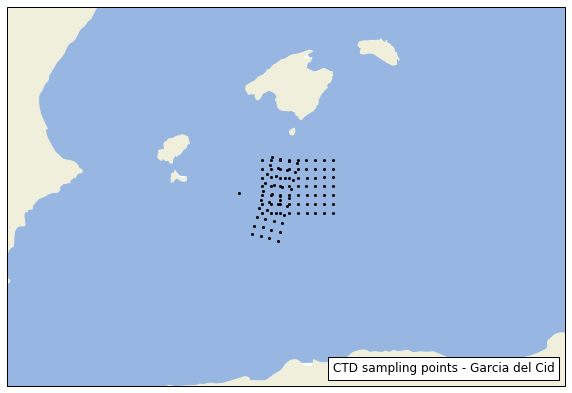

In [17]:
CTD_sampling_points(entry_data_response, 'black',2,3, 'CTD sampling points - Garcia del Cid')

<ul><li>Profiles</li></ul>

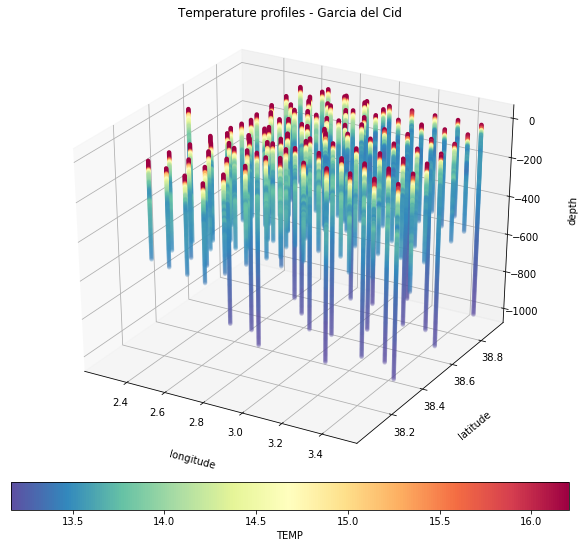

In [18]:
CTD_profiles(entry_data_response, 'WTR_TEM_01','Temperature profiles - Garcia del Cid','TEMP')

<ul><li>Animation</li></ul>

In [20]:
CTD_animation(entry_data_response,7)

---

## Next tutorial

<div class="alert alert-block alert-success" style="margin-left: 2em">
<b>More!</b>
    
***  
To see way more about SOCIB entries next dedicated notebooks:
<ul>
    <li><span><a href="05-entry-data-subsetting.ipynb">05-entry-data-subsetting</a></span></li>
    <li><span><a href="06-entry-data-resampling.ipynb">06-entry-data-resampling</a></span></li>
</ul>